**Data extraction and initial analysis**

Financial Data Analysis for Microsoft, Tesla, and Apple

In this notebook, we will analyze the financial data of Microsoft, Tesla, and Apple over the past three fiscal years. The data includes Total Revenue, Net Income, Total Assets, Total Liabilities, and Cash Flow from Operating Activities.


Import necessary libraries and load your data from the Excel file.

We start by importing the necessary libraries and loading the data into a pandas DataFrame. We also replace any NaN values with 0 to ensure accurate calculations.

In [ ]:
import pandas as pd

data=pd.read_csv(r"E:\financial_data.csv")

In [ ]:
data

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company
0,2023,211915,72361,411976,205753,87582,Microsoft
1,2022,198270,72738,364840,198298,89035,Microsoft
2,2021,168088,61271,333779,191791,76740,Microsoft
3,2023,96773,14974,106618,43009,13256,Tesla
4,2022,81462,12556,82338,36440,14724,Tesla
5,2021,53821,5519,62131,30548,11497,Tesla
6,2023,383285,96995,352583,290437,110543,Apple
7,2022,394328,99803,352755,302083,122151,Apple
8,2021,365817,94680,351002,287912,104038,Apple


**Analyzing Year-Over-Year Growth:**


Next, we calculate the year-over-year percentage changes for each financial metric. This will help us understand the growth trends for revenue, net income, assets, liabilities, and cash flow.

In [ ]:
# Calculate year-over-year percentage changes for each metric.

data['Revenue Growth (%)'] = data.groupby(['Company'])['Total Revenue'].pct_change().fillna(0) * 100
data['Net Income Growth (%)'] = data.groupby(['Company'])['Net Income'].pct_change().fillna(0) * 100
data['Assets Growth (%)'] = data.groupby('Company')['Total Assets'].pct_change().fillna(0) * 100
data['Liabilities Growth (%)'] = data.groupby('Company')['Total Liabilities'].pct_change().fillna(0) * 100
data['Cash Flow Growth (%)'] = data.groupby('Company')['Cash Flow from Operating Activities'].pct_change().fillna(0) * 100

In [ ]:
data # Display the updated dataframe

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
0,2023,211915,72361,411976,205753,87582,Microsoft,0.000000,0.000000,0.000000,0.000000,0.000000
1,2022,198270,72738,364840,198298,89035,Microsoft,-6.438902,0.520999,-11.441443,-3.623276,1.659017
2,2021,168088,61271,333779,191791,76740,Microsoft,-15.222676,-15.764800,-8.513595,-3.281425,-13.809176
3,2023,96773,14974,106618,43009,13256,Tesla,0.000000,0.000000,0.000000,0.000000,0.000000
4,2022,81462,12556,82338,36440,14724,Tesla,-15.821562,-16.147990,-22.772890,-15.273547,11.074231
5,2021,53821,5519,62131,30548,11497,Tesla,-33.931158,-56.044919,-24.541524,-16.169045,-21.916599
6,2023,383285,96995,352583,290437,110543,Apple,0.000000,0.000000,0.000000,0.000000,0.000000
7,2022,394328,99803,352755,302083,122151,Apple,2.881146,2.894995,0.048783,4.009820,10.500891
8,2021,365817,94680,351002,287912,104038,Apple,-7.230275,-5.133112,-0.496945,-4.691095,-14.828368


In [ ]:
data.to_csv('final_financial_data.csv')

**Exploring Aggregate Metrics:**

We now calculate the average growth rates for each financial metric over the three fiscal years. This helps in summarizing the overall financial performance of each company.

In [ ]:
# Calculate and visualize the average growth rates across the three years

average_growth = data.groupby('Company')[['Revenue Growth (%)', 'Net Income Growth (%)', 'Assets Growth (%)', 'Liabilities Growth (%)', 'Cash Flow Growth (%)']].mean()

average_growth



,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
Company,,,,,
Apple,-1.449710,-0.746039,-0.149388,-0.227092,-1.442492
Microsoft,-7.220526,-5.081267,-6.651679,-2.301567,-4.050053
Tesla,-16.584240,-24.064303,-15.771471,-10.480864,-3.614123


In [ ]:
average_growth.to_csv('average_growth.csv')

**Visualizing the Data:**

Visualize the trends using a simple plot.

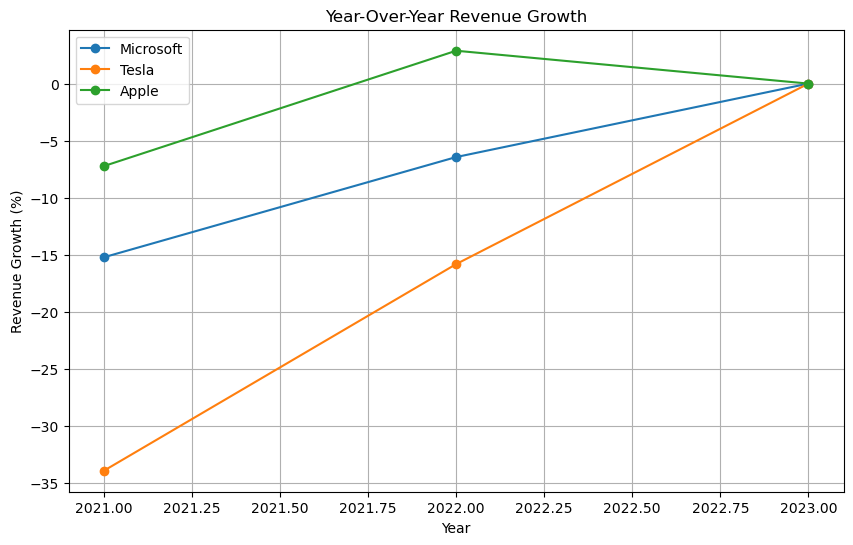

In [ ]:
import matplotlib.pyplot as plt

# Plot Revenue Growth for each company
plt.figure(figsize=(10,6))
for company in data['Company'].unique():
    plt.plot(data[data['Company'] == company]['Year'], 
             data[data['Company'] == company]['Revenue Growth (%)'], 
             marker='o', label=company)

plt.title('Year-Over-Year Revenue Growth')
plt.xlabel('Year')
plt.ylabel('Revenue Growth (%)')
plt.legend()
plt.grid(True)
plt.show()

Finally, we visualize the year-over-year revenue growth for each company to better understand the trends over the last three fiscal years.

**Conclusion**

This analysis provided insights into the financial performance of Microsoft, Tesla, and Apple over the past three fiscal years. By examining year-over-year growth rates in key financial metrics. These insights could inform the development of an AI-powered financial chatbot by identifying patterns in financial health and performance across different companies.